## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
dataset = pd.read_csv("datasets/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Features and Labels

In [3]:
X = dataset.iloc[:,1].values.reshape(-1,1)
y = dataset.iloc[:,-1].values.reshape(-1,1)

In [4]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [6]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the Model

In [7]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf') # other kernels: 'linear', 'poly', 'sigmoid'
svr_regressor.fit(X,y)

C:\Users\deva\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting Result

In [8]:
scaled_answer = svr_regressor.predict(sc_X.transform([[6.5]])) # level - 6.5
answer = sc_y.inverse_transform([[scaled_answer]])
print(answer) # salary

[[[170370.0204065]]]


## Visualizing Model Results

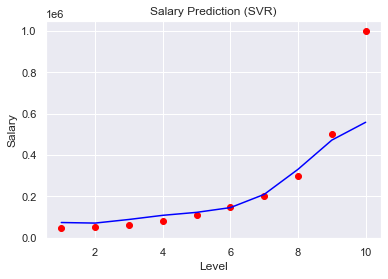

In [9]:
sns.set_theme()
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color="red")
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(svr_regressor.predict(X)),color="blue")
plt.title("Salary Prediction (SVR)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()